A python recreation of the R script I used for my masters project, which:

1) Analysed gene expression data from various Alloteropsis species and related donor species (in the context of lateral gene trasnfer)

2) Filtered accessions by suitable orthogroups, data type as well.

3) Performed statistical analysis on filtered datasets

4) Performed suitable calculations to assess gene expression differences.

5) Visualised data as appropriate.

The goal of this project was to see whether laterally transferred genes (LGTs) were regulated differently from their native orthologues within the 'recipient' species, and/or the native orthologue from their donor 'gene'. Gene expression was used as a proxy for regulation. 

Information about species phylogeny was gathered prior to study, gene expression data was collected then processed via software available on Linux (with the use of shell scripting)

In [1]:
#Importing packages for analysis
import numpy as np # to convert data type
import pandas as pd #pandas is a Python library (py terminology for package) whihc can help with data analysis, cleaning, manipulating and exploration
import matplotlib.pyplot as plt #matplotlib is a library for creating various visualisations
import seaborn as sns #assists in the creation of attractive and informative statistical graphs
import os #provides functions for interacting with the operating system
import statsmodels.api as sm
from plotnine import *

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Filtering data:

There is quite a lot of filters in the next section, I was time-strapped so chose to do things quite heavy handidly rather than shortening them with loops etc. but it got the job done. 

To understand the filters however an explanation is needed:

Orthogroup: A number tag (data type: string) which identifies related genes across our study species (i.e. Orthogroup 1 contains phylogenetically related genes)

Accessions: Geographically distinct accessions of Alloteropsis semialata (AUS, ZAM, KWT )
Donors: Setaria italica (SET) and Themeda triandra (THE), two species identified as having donated genes to A. semialata
Native (donor) genes: The vertically evolved native gene in our donor species.
Native (recipient) genes: The vertically evolved native gene in our recipient species.
LGTs: A gene thought have been laterally transferred to our A. semialata accessions (i.e. it's functional evolution occured in a different species)

Correspondingly I named my dataframes to indicate the dataset we're filteirng for. E.g. AUS_LGT includes only LGTs from the AUS accession.... AUS_SET_native includes native genes Setaria italica that have LGT relatives in our AUS accession.

The All_accessions data simply contains all of our Accession data (but not the SET/THE genes). These filters were done to allow for various different analysis. 

In [2]:
#Setting the working directory
os.chdir("/home/joe/Desktop/Coding/Python/Masters_Project/expression_data")
os.getcwd() #check if wd properly set, note this doesn't output within this jupyter cell for some reason
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.use_inf_as_na = False #set this to use tab separators for .csv files

#Add some functions to reduce later commands 
orthogroup = list(range(1, 180)) #no of orthogroups set 
columns_to_convert = ['average root', 'average tip leaf', 'average overall', 'sd.root', 'se.root', 'sd.tip.leaf', 'se.tip.leaf']

# Read the CSV file
AUS_LGT = pd.read_csv("AUS_LGT.csv")
AUS_LGT['type'] = "LGT"
AUS_native = pd.read_csv("AUS_native.csv")
AUS_SET_native = pd.read_csv("AUS_SET_native.csv")
AUS_THE_native = pd.read_csv("AUS_THE_native.csv")
AUS_native['type'] = "Recipient"
AUS_SET_native['type'] = "Donor"
AUS_THE_native['type'] = "Donor"

#Make AUS list 
AUS_df = [AUS_LGT, AUS_native, AUS_SET_native, AUS_THE_native]
for df in AUS_df:
    df['orthogroup'] = orthogroup
    df['orthogroup'] = df['orthogroup'].astype(str)
    df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce') 
    df['accession'] = "AUS"
 



In [3]:
# Read the CSV file
ZAM_LGT = pd.read_csv("ZAM_LGT.csv")
ZAM_LGT['type'] = "LGT"
ZAM_native = pd.read_csv("ZAM_native.csv")
ZAM_SET_native = pd.read_csv("ZAM_SET_native.csv")
ZAM_THE_native = pd.read_csv("ZAM_THE_native.csv")
ZAM_native['type'] = "Recipient"
ZAM_SET_native['type'] = "Donor"
ZAM_THE_native['type'] = "Donor"

#Make ZAM list 
ZAM_df = [ZAM_LGT, ZAM_native, ZAM_SET_native, ZAM_THE_native]
for df in ZAM_df:
    df['orthogroup'] = orthogroup
    df['orthogroup'] = df['orthogroup'].astype(str)
    df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce') 
    df['accession'] = "ZAM"



In [4]:
# Read the CSV file
KWT_LGT = pd.read_csv("KWT_LGT.csv")
KWT_LGT['type'] = "LGT"
KWT_native = pd.read_csv("KWT_native.csv")
KWT_SET_native = pd.read_csv("KWT_SET_native.csv")
KWT_THE_native = pd.read_csv("KWT_THE_native.csv")
KWT_native['type'] = "Recipient"
KWT_SET_native['type'] = "Donor"
KWT_THE_native['type'] = "Donor"

#Make KWT list 
KWT_df = [KWT_LGT, KWT_native, KWT_SET_native, KWT_THE_native]
for df in KWT_df:
    df['orthogroup'] = orthogroup
    df['orthogroup'] = df['orthogroup'].astype(str)
    df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce') 
    df['accession'] = "KWT"
    
#OK all work as intended, remember to include proper indenting!

In [5]:
# Read CSV files for Setaria and Themeda data
SET_native = pd.read_csv("All_SET_native.csv")
THE_native = pd.read_csv("All_THE_native.csv")

SET_native['orthogroup'] = orthogroup
THE_native['orthogroup'] = orthogroup
SET_native['orthogroup'] = SET_native['orthogroup'].astype(str)
THE_native['orthogroup'] = THE_native['orthogroup'].astype(str)
SET_native['type'] = "SET"
THE_native['type'] = "THE"

# Combine data from different dataframes into a single dataframe
All_accessions = pd.concat([AUS_LGT, AUS_native, KWT_LGT, KWT_native, ZAM_LGT, ZAM_native])

All_accessions = All_accessions[['gene', 'orthogroup', 'type', 'accession', 'average tip leaf', 'average root', 'donor']]
All_accessions = All_accessions.dropna(subset=['average tip leaf'])
# Check the column names of the All_accessions dataframe

#Do the same for a df containing Donor genes too
All_accessions_with_donor = pd.concat([AUS_LGT, AUS_native, KWT_LGT, KWT_native, ZAM_LGT, ZAM_native, SET_native, THE_native])

# Select specific columns
All_accessions_with_donor = All_accessions_with_donor[['gene', 'orthogroup', 'type', 'accession', 'average tip leaf', 'average root', 'donor']]

# Filter rows where 'average.tip.leaf' is not NaN
All_accessions_with_donor = All_accessions_with_donor.dropna(subset=['average tip leaf'])

# Filter rows where 'donor' is either "Cenchrinae" or "Andropogoneae"
All_accessions_with_donor = All_accessions_with_donor[All_accessions_with_donor['donor'].isin(['Cenchrinae', 'Andropogoneae'])]

# print(All_accessions_with_donor['type'].unique()) seems to be good

The next step is to filter our data to only contain:

1) Genes linked to Cenchrinae or Andropogoneae donors (which we are using S. italica and T. triandra as proxies for)

2) LGTs and Recipients within this dataset

3) Orthogroups which have both data for LGTS and Recipient genes

In [6]:
 # Filter rows where donor is "Cenchrinae" or "Andropogoneae"
All_accessions = All_accessions[(All_accessions['donor'] == "Cenchrinae") | (All_accessions['donor'] == "Andropogoneae")]

# Filter rows where type is "LGT"
All_accessions_LGT = All_accessions[All_accessions['type'] == "LGT"]

# Filter rows where type is "Recipient"
All_accessions_recipient = All_accessions[All_accessions['type'] == "Recipient"]

# Perform anti-join to get rows where orthogroup is in LGT but not in Recipient
LGTortho = All_accessions_LGT.merge(All_accessions_recipient, on="orthogroup", how="left", indicator=True)
LGTortho = LGTortho[LGTortho['_merge'] == 'left_only']
LGTortho.drop(columns='_merge', inplace=True)

# Perform anti-join to get rows where orthogroup is in Recipient but not in LGT
Recortho = All_accessions_recipient.merge(All_accessions_LGT, on="orthogroup", how="left", indicator=True)
Recortho = Recortho[Recortho['_merge'] == 'left_only']
Recortho.drop(columns='_merge', inplace=True)

# Combine the results of LGTortho and Recortho
Diffortho = pd.concat([LGTortho, Recortho])

# List of orthogroups that aren't in both LGT and Recipient
print(Diffortho['orthogroup'].tolist())

# Filter rows where orthogroup is not in the specified list
orthogroups_to_remove = ["170", "172", "39", "50", "163", "71", "76", "86", "89", "102", "106", "145", "148", "163", "170", "172", "174", "176", "177", "21", "26", "21", "117"]
All_accessions = All_accessions[~All_accessions['orthogroup'].isin(orthogroups_to_remove)]

#recreate the All_Accessions dataframes to include the orthogroup filtering
 # Filter rows where donor is "Cenchrinae" or "Andropogoneae"
All_accessions = All_accessions[(All_accessions['donor'] == "Cenchrinae") | (All_accessions['donor'] == "Andropogoneae")]

# Filter rows where type is "LGT"
All_accessions_LGT = All_accessions[All_accessions['type'] == "LGT"]

# Filter rows where type is "Recipient"
All_accessions_recipient = All_accessions[All_accessions['type'] == "Recipient"]

['170', '172', '39', '50', '163', '71', '76', '86', '89', '102', '106', '145', '148', '163', '170', '172', '174', '176', '177', '21', '26', '21', '117']


Now it's time for some statistical tests, the first is a Kruskal Wallis Chi-2 test:

We want to see whether:

1) Alloteropsis recipient gene expression differs between accessions (root and tip leaf)
2) Alloteropsis LGT expression differs between accessions (root and tip leaf) 

In [7]:
from scipy.stats import stats #stats package
from scipy.stats import kruskal 
#Recipient x root 
krr = kruskal(*[group['average root'].values for name, group in All_accessions_recipient.groupby('accession')])
print(krr)
#KruskalResult(statistic=1.8117499837828739, pvalue=0.4041880690494699)

#Recipient x tip leaf
krtl = kruskal(*[group['average tip leaf'].values for name, group in All_accessions_recipient.groupby('accession')])
[print(krtl)]
#KruskalResult(statistic=4.487708380395908, pvalue=0.10604898274925764)

#LGT x root
klr = kruskal(*[group['average root'].values for name, group in All_accessions_LGT.groupby('accession')])
print(klr)
#KruskalResult(statistic=1.7931571144700287, pvalue=0.40796309698494104)

#LGT x tip leaf 
kltl = kruskal(*[group['average tip leaf'].values for name, group in All_accessions_LGT.groupby('accession')])
print(kltl)
#KruskalResult(statistic=0.5297991399224353, pvalue=0.7672830043683889)

#Slight variation explained by differences in python/R algorithms 

#Okay... we finally sorted out our data and got the tests done successfully...
 

KruskalResult(statistic=1.8117499837828739, pvalue=0.4041880690494699)
KruskalResult(statistic=4.487708380395908, pvalue=0.10604898274925764)
KruskalResult(statistic=1.7931571144700287, pvalue=0.40796309698494104)
KruskalResult(statistic=0.5297991399224353, pvalue=0.7672830043683889)


Now for the next step... the recreation of Figure 1...

This was made to see the distribution of gene expression across our accessions. There should a histogram for the tip leaf and root expression, as well as replicate graphs using a narrower range on the X axis (for higher clarity)

NOTE: I had EXTREME trouble trying to replicate this plot in Python, I resorted to using the plotnine (ggplot) package to get an output that was the same as 'R'. I believe Python by default must produce its histograms differently than ggplot2 does, and even ggplot2 required significant tinkering and configuration to get it to look the same...

Additionally, I left the colour defaults as they were deliberately to distinguish the ones made on python vs R.

My other attempt using seaborn was probably successful, but the visualisation differed for some unknown reason... I even checked all the data against my original R script but there just seemed to be missing data. I tried changing the binwidth, tried deliberately including '0' values but couldn't find any explanations on why the data output differed. 

Also ancedotally, it seems python just adjusts the colours sometimes when using the exact same code. I also feel 'R' is more prone to errors on Linux relative to Windows...

In [8]:
# Does All_accessions actually match between 'R' and 'Python'... yes is the answer. 

# Filter the DataFrame to include rows where 'average.root' is between 0 and 30
filtered_accessions = All_accessions[(All_accessions['average root'] >= 0) & (All_accessions['average root'] <= 30)]

# Group the data by 'accession' and calculate the sum of 'average.root' for each group
accession_sums = filtered_accessions.groupby('accession')['average root'].sum().reset_index()

print(accession_sums)

  accession  average root
0       AUS    247.136528
1       KWT    218.920583
2       ZAM    812.320797


/home/joe/.local/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 7 in image.
/home/joe/.local/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /home/joe/Desktop/Coding/Python/Masters_Project/graphs/results1/plotnine_root_histogram_all.png
/home/joe/.local/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 7 in image.
/home/joe/.local/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /home/joe/Desktop/Coding/Python/Masters_Project/graphs/results1/plotnine_root_histogram_250.png
/home/joe/.local/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 6 rows containing non-finite values.
/home/joe/.local/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 12 rows containing missing values.
/home/joe/.local/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed

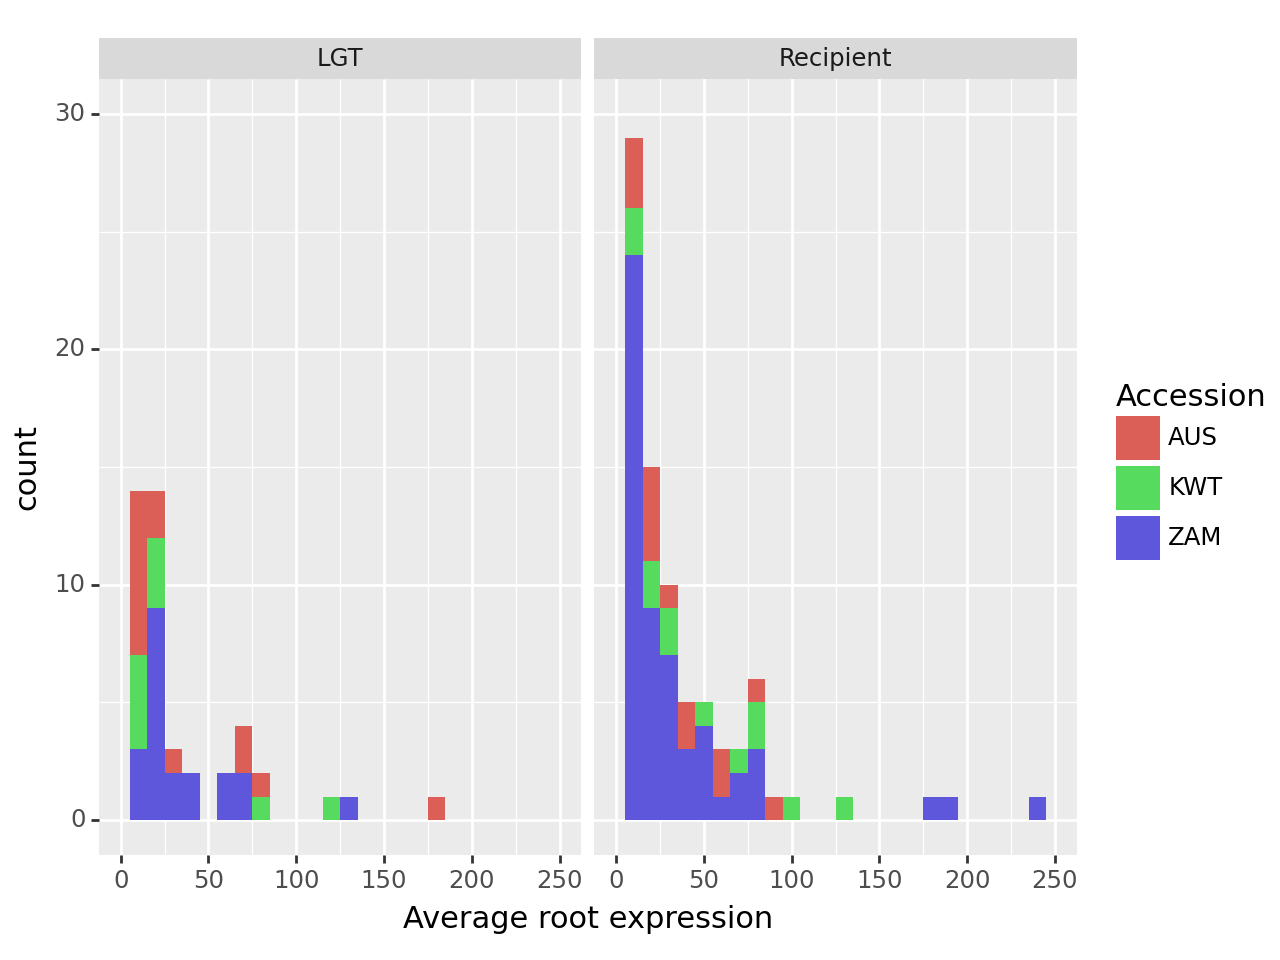

In [9]:
# Plot the histogram for ROOT expression 
plotROOT = ggplot(All_accessions, aes(x='average root', fill='accession')) + \
       geom_histogram(binwidth=30) + \
       facet_wrap('~type') + \
       xlab("Average root expression") + \
       labs(fill="Accession")

# Save the plot to a file with width and height in inches
ggsave(plotROOT, filename="/home/joe/Desktop/Coding/Python/Masters_Project/graphs/results1/plotnine_root_histogram_all.png", width=12, height=7)
plotROOT

plotROOT250 = ggplot(All_accessions, aes(x='average root', fill='accession')) + \
       geom_histogram(binwidth=10) + \
       facet_wrap('~type') + \
       xlab("Average root expression") + \
       labs(fill="Accession") + \
       scale_x_continuous(limits=(0, 250)) + \
       scale_y_continuous(limits=(0, 30))

# Save the plot to a file with width and height in inches
ggsave(plotROOT250, filename="/home/joe/Desktop/Coding/Python/Masters_Project/graphs/results1/plotnine_root_histogram_250.png", width=12, height=7)

# Display the plot
print(plotROOT250)

In [10]:
# Does All_accessions actually match between 'R' and 'Python'... yes is the answer. 

# Filter the DataFrame to include rows where 'average.tip leaf' is between 0 and 30
filtered_accessions = All_accessions[(All_accessions['average tip leaf'] >= 0) & (All_accessions['average tip leaf'] <= 30)]

# Group the data by 'accession' and calculate the sum of 'average.root' for each group
accession_sums = filtered_accessions.groupby('accession')['average tip leaf'].sum().reset_index()

print(accession_sums)

  accession  average tip leaf
0       AUS        321.895861
1       KWT        143.740667
2       ZAM        929.797684


In [11]:
# Plot the histogram for tip leaf expression 
plotLEAF = ggplot(All_accessions, aes(x='average tip leaf', fill='accession')) + \
       geom_histogram(binwidth=300) + \
       facet_wrap('~type') + \
       xlab("Average tip leaf expression") + \
       labs(fill="Accession")

# Save the plot to a file with width and height in inches
ggsave(plotLEAF, filename="/home/joe/Desktop/Coding/Python/Masters_Project/graphs/results1/plotnine_tip_leaf_histogram_all.png", width=12, height=7)

plotLEAF 

plotLEAF250 = ggplot(All_accessions, aes(x='average tip leaf', fill='accession')) + \
       geom_histogram(binwidth=10) + \
       facet_wrap('~type') + \
       xlab("Average tip leaf expression") + \
       labs(fill="Accession") + \
       scale_x_continuous(limits=(0, 250)) + \
       scale_y_continuous(limits=(0, 30))
       
plotLEAF250
ggsave(plotLEAF, filename="/home/joe/Desktop/Coding/Python/Masters_Project/graphs/results1/plotnine_tip_leaf_histogram_250.png", width=12, height=7)

/home/joe/.local/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 7 in image.
/home/joe/.local/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /home/joe/Desktop/Coding/Python/Masters_Project/graphs/results1/plotnine_tip_leaf_histogram_all.png
/home/joe/.local/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 7 in image.
/home/joe/.local/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /home/joe/Desktop/Coding/Python/Masters_Project/graphs/results1/plotnine_tip_leaf_histogram_250.png


Histograms done and saved... now I need to:

1) Make appropriate filters for Figure 2, which looks at the relative expression of shared 'native recipient' genes in KWT vs AUS, KWT vs ZAM and ZAM vs AUS for both the roots and leaves respectively. 

2) Calculate average ranges for purposes of plotting.

3) Create Figure 2 plots 

4) Create Figure 3 plot, which is a comparison of root x leaf expression for LGTs, (all) native recipients, SET native and THE native. 

In [12]:
dotplotleaf = All_accessions[['average tip leaf', 'orthogroup', 'type', 'accession']].copy()
dotplotleaf.rename(columns={'average tip leaf': 'expression'}, inplace=True)
dotplotleaf['area'] = "Tip.leaf"

dotplotroot = All_accessions[['average root', 'orthogroup', 'type', 'accession']].copy()
dotplotroot.rename(columns={'average root': 'expression'}, inplace=True)
dotplotroot['area'] = "Root"

dotplot = pd.concat([dotplotleaf, dotplotroot], ignore_index=True)

dotplotZAM = dotplot[dotplot['accession'] == "ZAM"].copy()
dotplotZAM.rename(columns={'expression': 'ZAM_expression'}, inplace=True)
dotplotZAM = dotplotZAM[['ZAM_expression', 'orthogroup', 'type', 'area']]

dotplotKWT = dotplot[dotplot['accession'] == "KWT"].copy()
dotplotKWT.rename(columns={'expression': 'KWT_expression'}, inplace=True)
dotplotKWT = dotplotKWT[['KWT_expression', 'orthogroup', 'type', 'area']]

dotplotAUS = dotplot[dotplot['accession'] == "AUS"].copy()
dotplotAUS.rename(columns={'expression': 'AUS_expression'}, inplace=True)
dotplotAUS = dotplotAUS[['AUS_expression', 'orthogroup', 'type', 'area']]

dotplotAUSKWT = pd.merge(dotplotAUS, dotplotKWT)
dotplotAUSZAM = pd.merge(dotplotZAM, dotplotAUS)
dotplotKWTZAM = pd.merge(dotplotZAM, dotplotKWT)

dotplotAUSKWT['difference'] = dotplotAUSKWT['AUS_expression'] - dotplotAUSKWT['KWT_expression']
dotplotAUSZAM['difference'] = dotplotAUSZAM['AUS_expression'] - dotplotAUSZAM['ZAM_expression']
dotplotKWTZAM['difference'] = dotplotKWTZAM['KWT_expression'] - dotplotKWTZAM['ZAM_expression']
 

In [13]:
# Group by 'area' and 'type', then calculate the IQR of 'AUS_expression' for both AUS and KWT 
dotplotAUSKWT_IQR_AUS = dotplotAUSKWT.groupby(['area', 'type'])['AUS_expression'].quantile(0.75) - dotplotAUSKWT.groupby(['area', 'type'])['AUS_expression'].quantile(0.25)
dotplotAUSKWT_IQR_AUS = dotplotAUSKWT_IQR_AUS.reset_index() # Reset the index to have a nice tabular format
dotplotAUSKWT_IQR_AUS.rename(columns={'AUS_expression': 'AUS_expression_IQR'}, inplace=True) #rename
#print(dotplotAUSKWT_IQR_AUS) #print results

#Now for KWT 
dotplotAUSKWT_IQR_KWT = dotplotAUSKWT.groupby(['area', 'type'])['KWT_expression'].quantile(0.75) - dotplotAUSKWT.groupby(['area', 'type'])['KWT_expression'].quantile(0.25)
dotplotAUSKWT_IQR_KWT = dotplotAUSKWT_IQR_KWT.reset_index()
dotplotAUSKWT_IQR_KWT.rename(columns={'KWT_expression': 'KWT_expression_IQR'}, inplace=True)

#Now for AUSZAM datasets, starting with AUS
dotplotAUSZAM_IQR_AUS = dotplotAUSZAM.groupby(['area', 'type'])['AUS_expression'].quantile(0.75) - dotplotAUSZAM.groupby(['area', 'type'])['AUS_expression'].quantile(0.25)
dotplotAUSZAM_IQR_AUS = dotplotAUSZAM_IQR_AUS.reset_index() # Reset the index to have a nice tabular format
dotplotAUSZAM_IQR_AUS.rename(columns={'AUS_expression': 'AUS_expression_IQR'}, inplace=True) #rename

#ZAM
dotplotAUSZAM_IQR_ZAM = dotplotAUSZAM.groupby(['area', 'type'])['ZAM_expression'].quantile(0.75) - dotplotAUSZAM.groupby(['area', 'type'])['ZAM_expression'].quantile(0.25)
dotplotAUSZAM_IQR_ZAM = dotplotAUSZAM_IQR_ZAM.reset_index() # Reset the index to have a nice tabular format
dotplotAUSZAM_IQR_ZAM.rename(columns={'ZAM_expression': 'ZAM_expression_IQR'}, inplace=True) #rename

#Now for ZAMKWT (KWT first)
dotplotKWTZAM_IQR_KWT = dotplotKWTZAM.groupby(['area', 'type'])['KWT_expression'].quantile(0.75) - dotplotKWTZAM.groupby(['area', 'type'])['KWT_expression'].quantile(0.25)
dotplotKWTZAM_IQR_KWT = dotplotKWTZAM_IQR_KWT.reset_index() # Reset the index to have a nice tabular format
dotplotKWTZAM_IQR_KWT.rename(columns={'KWT_expression': 'KWT_expression_IQR'}, inplace=True) #rename
print(dotplotKWTZAM_IQR_KWT)

#Now for ZAMKWT (ZAM)
dotplotKWTZAM_IQR_ZAM = dotplotKWTZAM.groupby(['area', 'type'])['ZAM_expression'].quantile(0.75) - dotplotKWTZAM.groupby(['area', 'type'])['ZAM_expression'].quantile(0.25)
dotplotKWTZAM_IQR_ZAM = dotplotKWTZAM_IQR_ZAM.reset_index() # Reset the index to have a nice tabular format
dotplotKWTZAM_IQR_ZAM.rename(columns={'ZAM_expression': 'ZAM_expression_IQR'}, inplace=True) #rename
print(dotplotKWTZAM_IQR_ZAM)

#For genes contained in multiple accessions 
root_IQR = All_accessions_with_donor.groupby(['accession', 'type'])['average root'].agg(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
tip_leaf_IQR = All_accessions_with_donor.groupby(['accession', 'type'])['average tip leaf'].agg(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
#print(root_IQR)
#print(tip_leaf_IQR)
 

       area       type  KWT_expression_IQR
0      Root        LGT           11.796667
1      Root  Recipient           21.881667
2  Tip.leaf        LGT           10.792333
3  Tip.leaf  Recipient           11.360667
       area       type  ZAM_expression_IQR
0      Root        LGT            4.528333
1      Root  Recipient            8.606917
2  Tip.leaf        LGT            5.493333
3  Tip.leaf  Recipient           15.733333


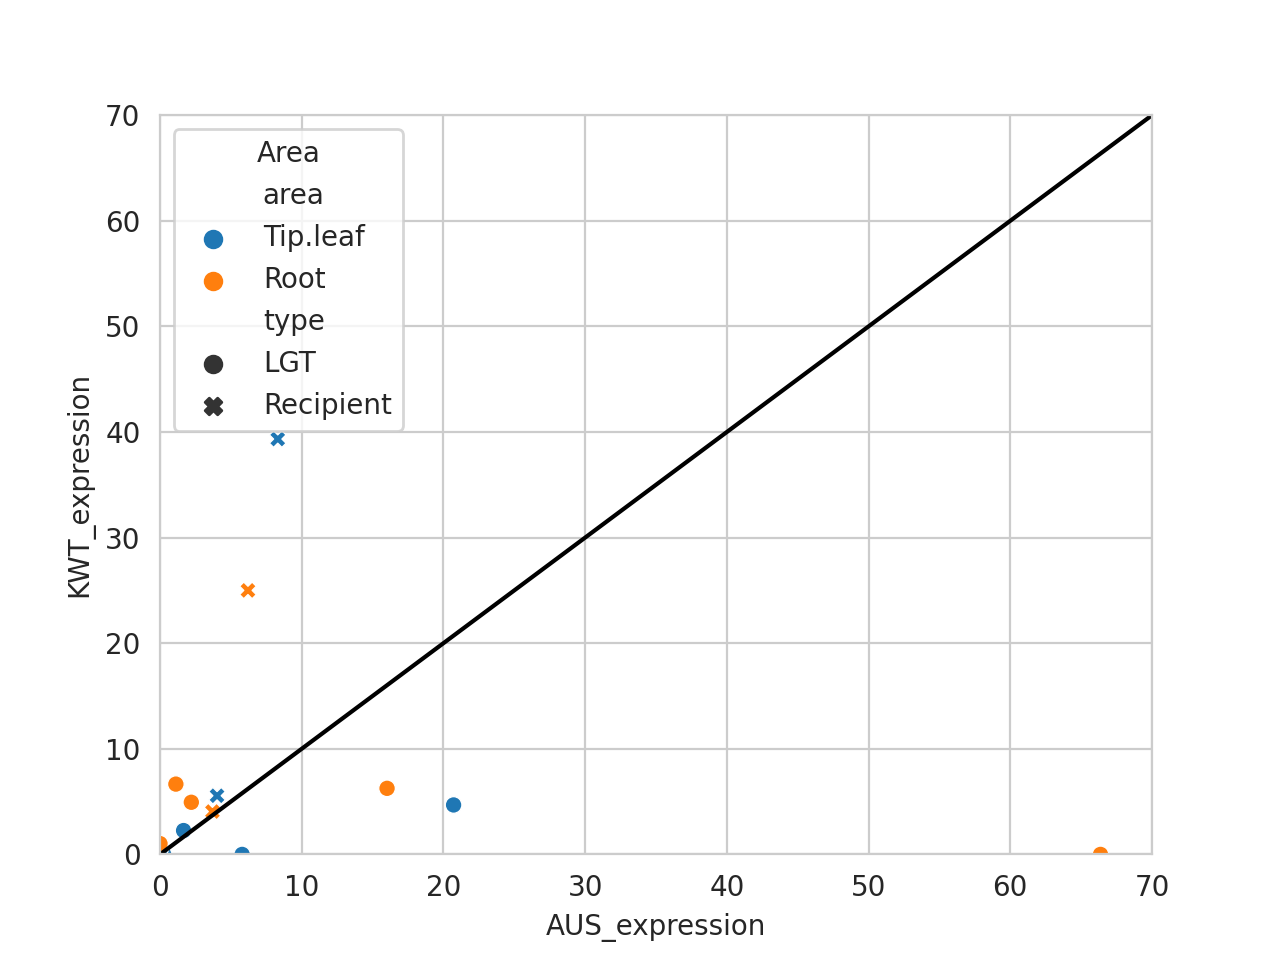

In [14]:
#KWT x AUS dotplot 
# Set the style to "whitegrid" for a distinct background
sns.set_style("whitegrid")

# Plot the scatter plot with seaborn
sns.scatterplot(data=dotplotAUSKWT, x='AUS_expression', y='KWT_expression', hue='area', style='type')

# Add the black diagonal line
plt.plot([0, 70], [0, 70], color='black')

# Set the x and y-axis limits
plt.xlim(0, 70)
plt.ylim(0, 70)

# Set the axis labels
plt.xlabel('AUS_expression')
plt.ylabel('KWT_expression')

# Show the legend
plt.legend(title='Area')

# Create the directory if it doesn't exist
output_dir = "/home/joe/Desktop/Coding/Python/Masters_Project/graphs/results2/"
os.makedirs(output_dir, exist_ok=True)

# Save the plot to the specified directory
output_filename = "AUSxKWT_sb.png"
output_path = os.path.join(output_dir, output_filename)
plt.savefig(output_path)

# Show the plot
plt.show()


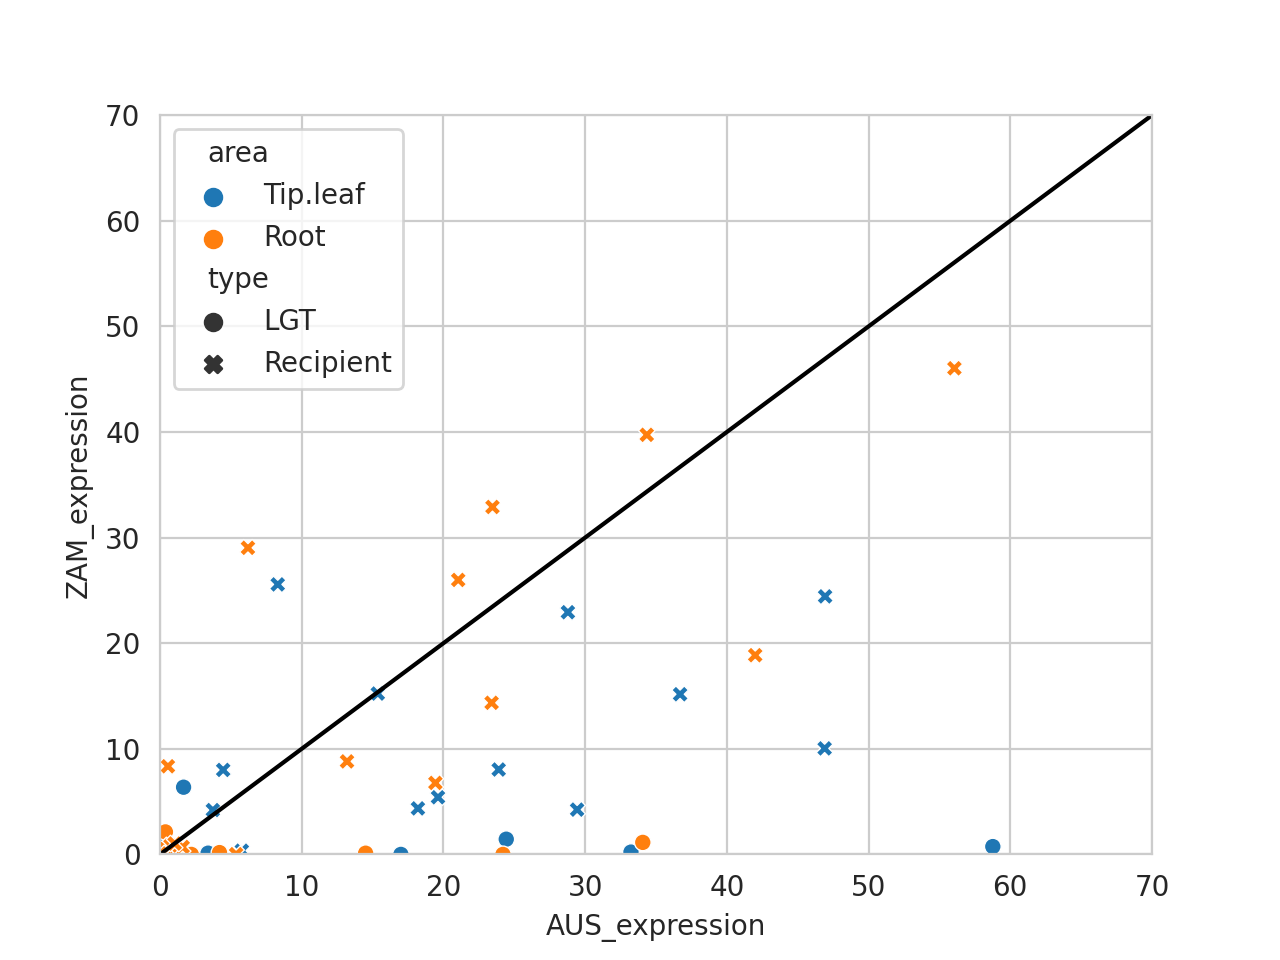

In [15]:
#ZAM x AUS dotplot 
# Set the style to "whitegrid" for a distinct background
sns.set_style("whitegrid")

# Plot the scatter plot with seaborn
sns.scatterplot(data=dotplotAUSZAM, x='AUS_expression', y='ZAM_expression', hue='area', style='type')

# Add the black diagonal line
plt.plot([0, 70], [0, 70], color='black')

# Set the x and y-axis limits
plt.xlim(0, 70)
plt.ylim(0, 70)

# Set the axis labels
plt.xlabel('AUS_expression')
plt.ylabel('ZAM_expression')

# Create the directory if it doesn't exist
output_dir = "/home/joe/Desktop/Coding/Python/Masters_Project/graphs/results2/"
os.makedirs(output_dir, exist_ok=True)

# Save the plot to the specified directory
output_filename = "AUSxZAM_sb.png"
output_path = os.path.join(output_dir, output_filename)
plt.savefig(output_path)

# Show the plot
plt.show()


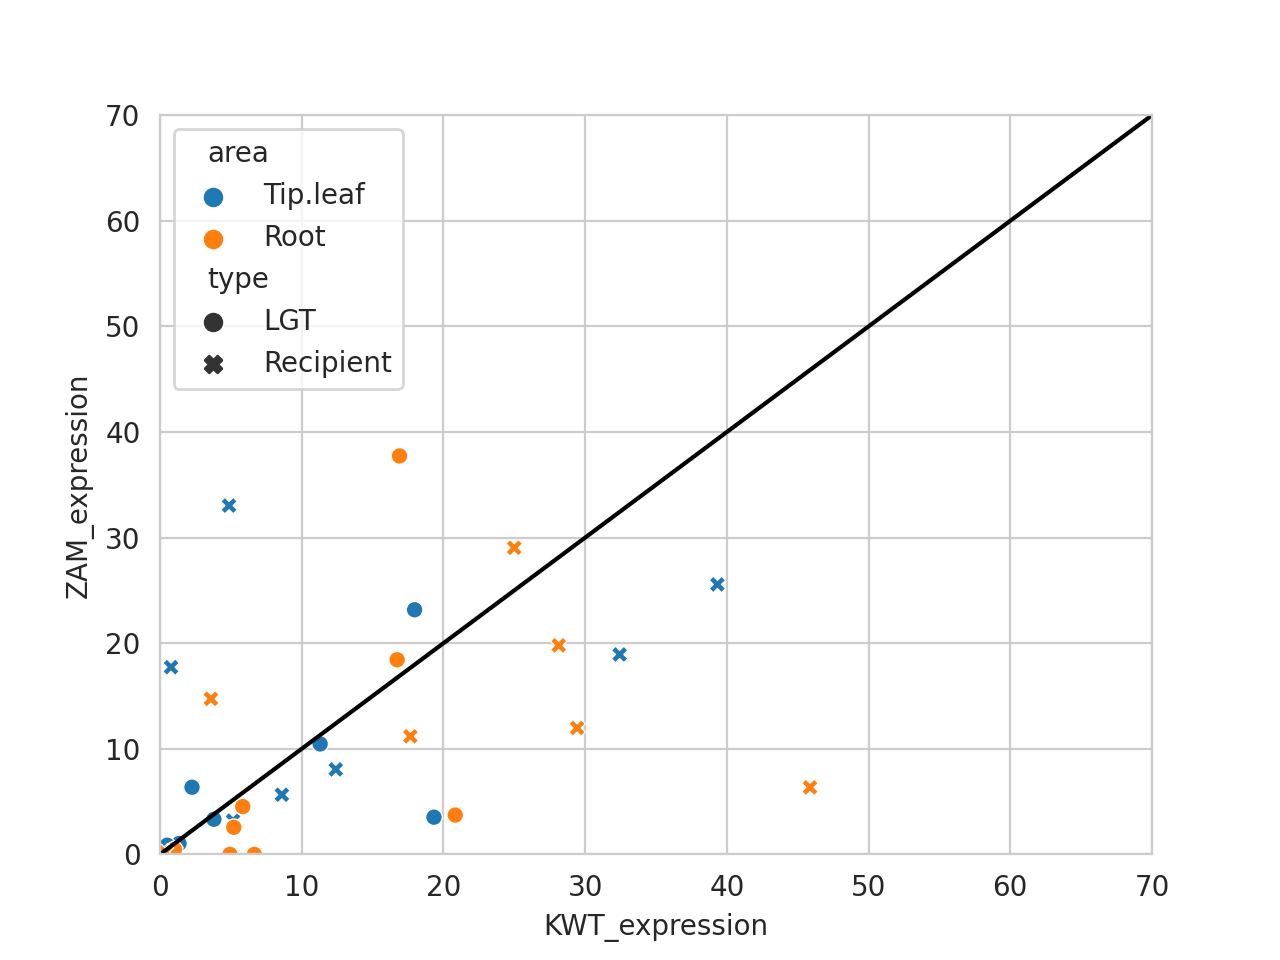

In [16]:
#ZAM x AUS dotplot 
# Set the style to "whitegrid" for a distinct background
sns.set_style("whitegrid")

# Plot the scatter plot with seaborn
sns.scatterplot(data=dotplotKWTZAM, x='KWT_expression', y='ZAM_expression', hue='area', style='type')

# Add the black diagonal line
plt.plot([0, 70], [0, 70], color='black')

# Set the x and y-axis limits
plt.xlim(0, 70)
plt.ylim(0, 70)

# Set the axis labels
plt.xlabel('KWT_expression')
plt.ylabel('ZAM_expression')

# Create the directory if it doesn't exist
output_dir = "/home/joe/Desktop/Coding/Python/Masters_Project/graphs/results2/"
os.makedirs(output_dir, exist_ok=True)

# Save the plot to the specified directory
output_filename = "KWTxZAM_sb.png"
output_path = os.path.join(output_dir, output_filename)
plt.savefig(output_path)

# Show the plot
plt.show()


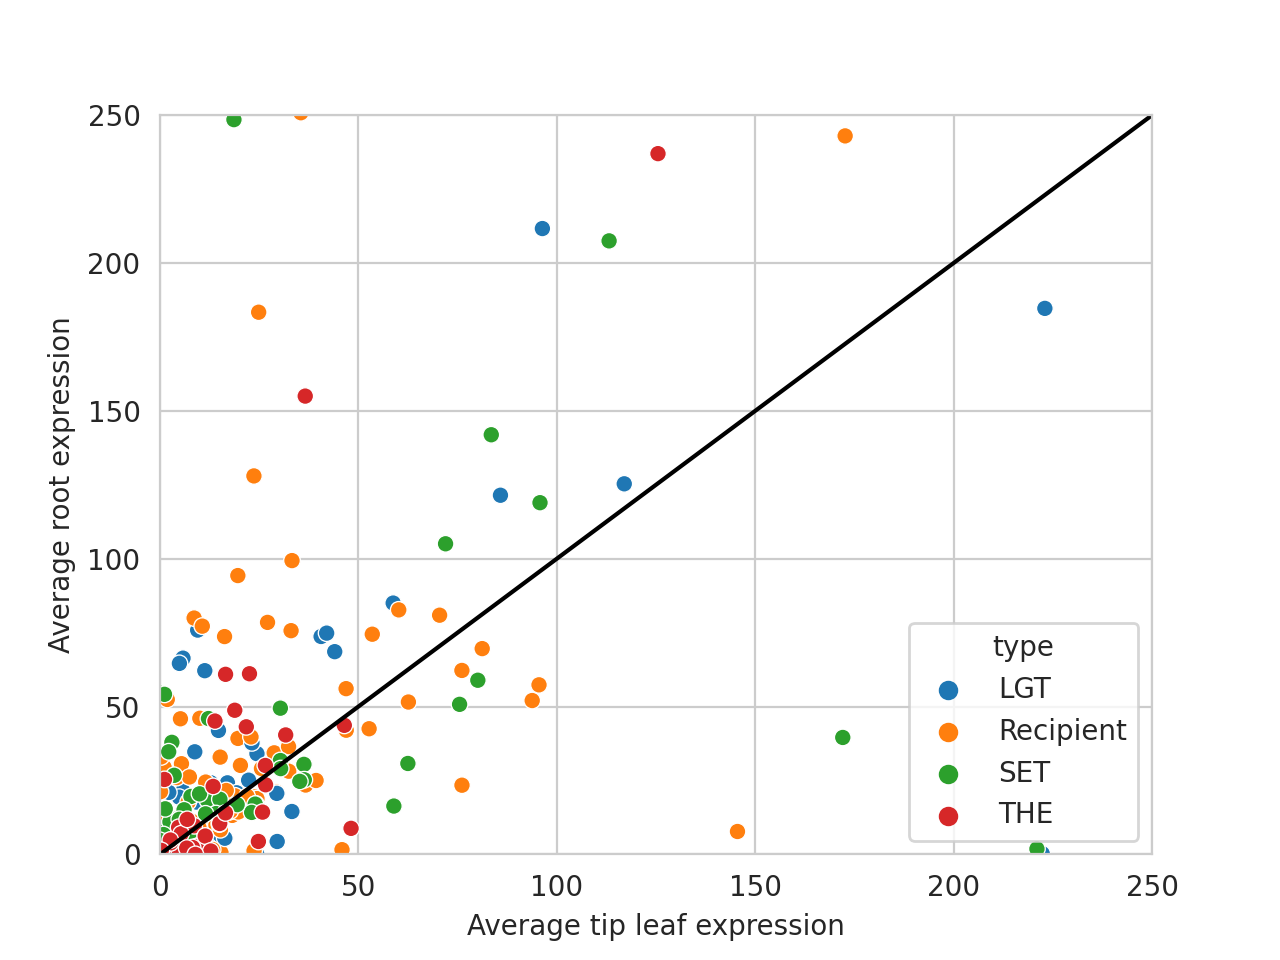

In [17]:
#Now for Figure 3 
# Set the style to "whitegrid" for a distinct background
sns.set_style("whitegrid")

# Plot the scatter plot with seaborn
sns.scatterplot(data=All_accessions_with_donor, x='average tip leaf', y='average root', hue='type')

# Add the black diagonal line
plt.plot([0, 250], [0, 250], color='black')

# Set the x and y-axis limits
plt.xlim(0, 250)
plt.ylim(0, 250)

# Set the axis labels
plt.xlabel('Average tip leaf expression')
plt.ylabel('Average root expression')

# Create the directory if it doesn't exist
output_dir = "/home/joe/Desktop/Coding/Python/Masters_Project/graphs/results3/"
os.makedirs(output_dir, exist_ok=True)

# Save the plot to the specified directory
output_filename = "RootvsTipleaf.png"
output_path = os.path.join(output_dir, output_filename)
plt.savefig(output_path)

# Show the plot
plt.show()

Now for some calculations/stats to check:

1) Whether expression was significantly different between the root and leaf tip for:
    - Each donor species native genes (SET and THE)
    - Recipient (Alloteropsis) native genes
    - LGTs identified in Alloteropsis 
2) If there was a correlation between tip leaf and root expression for:
    - Recipient genes
    - LGTs 
    - SET and THE native genes
3) The IQR of root and tip leaf expression (for the purposes of tables) for:
    - THE and SET
    - LGTs
    - Recipient genes 

In [18]:
# Select columns and rename them
from scipy.stats import wilcoxon #

root_wilcox = All_accessions[['orthogroup', 'type', 'average root', 'donor']]
root_wilcox = root_wilcox.rename(columns={'average root': 'expression'})
root_wilcox['area'] = 'root'

tip_leaf_wilcox = All_accessions[['orthogroup', 'type', 'average tip leaf', 'donor']]
tip_leaf_wilcox = tip_leaf_wilcox.rename(columns={'average tip leaf': 'expression'})
tip_leaf_wilcox['area'] = 'tip leaf'

wilcox_root_leaf = pd.concat([root_wilcox, tip_leaf_wilcox], ignore_index=True)
#print(wilcox_root_leaf) 
#data successfully filtered to include 'expression' and 'area' separately

# Now to look at LGT and recipients specifically

wilcox_root_leaf_LGT = wilcox_root_leaf[wilcox_root_leaf['type'] == 'LGT']
wilcox_root_leaf_Recipient = wilcox_root_leaf[wilcox_root_leaf['type'] == 'Recipient']

print((wilcox_root_leaf_LGT['expression'] == 0).sum()) #checking matching data 

#LGT comparisons with THE and SET native genes
wilcoxrootleafLGT_THE = wilcox_root_leaf_LGT[wilcox_root_leaf_LGT['donor'] == "Andropogoneae"]
wilcoxrootleafLGT_SET = wilcox_root_leaf_LGT[wilcox_root_leaf_LGT['donor'] == "Cenchrinae"]


61


In [19]:
# Native root vs tip leaf comparisons for SET and THE
SET_wilcox_native = All_accessions_with_donor[All_accessions_with_donor['type'] == "SET"]
THE_wilcox_native = All_accessions_with_donor[All_accessions_with_donor['type'] == "THE"]

# Process SET dataframes
SET_wilcox_root = SET_wilcox_native[['orthogroup', 'type', 'average root']].copy()
SET_wilcox_root.rename(columns={'average root': 'expression'}, inplace=True)
SET_wilcox_root['area'] = 'root'

SET_wilcox_tip_leaf = SET_wilcox_native[['orthogroup', 'type', 'average tip leaf']].copy()
SET_wilcox_tip_leaf.rename(columns={'average tip leaf': 'expression'}, inplace=True)
SET_wilcox_tip_leaf['area'] = 'tip leaf'

# Process THE dataframes
THE_wilcox_root = THE_wilcox_native[['orthogroup', 'type', 'average root']].copy()
THE_wilcox_root.rename(columns={'average root': 'expression'}, inplace=True)
THE_wilcox_root['area'] = 'root'

THE_wilcox_tip_leaf = THE_wilcox_native[['orthogroup', 'type', 'average tip leaf']].copy()
THE_wilcox_tip_leaf.rename(columns={'average tip leaf': 'expression'}, inplace=True)
THE_wilcox_tip_leaf['area'] = 'tip leaf'

# Concatenate the dataframes
SET_wilcox_tiproot = pd.concat([SET_wilcox_root, SET_wilcox_tip_leaf], axis=0, ignore_index=False)
THE_wilcox_tiproot = pd.concat([THE_wilcox_root, THE_wilcox_tip_leaf], axis=0, ignore_index=False)

 

Now for some tests... but there's something interesting to consider that I hadn't before and I've noticed while all significant, my P-values can match or not match my 'R' script dependant on some settings.

I noticed this because my R values for "wilcox_root_leaf_LGT" are V = 3592, p-value = 0.002653 

1) Continuity correction (correction = True/False)... this generally is set to False for datasets larger than 50. It has a very minor impact on my p value. 

2) Zero_method = 'zsplit', zsplit handles ties by separating them into separate ranks for each half... it's apparently more accurate even when 61/423 values are zero. It reduces my p value from  ~0.00265 -> ~0.00139 which doesn't yield any new information on significance. 

3) Alternative = 'two-sided' this is the default option, to make it a two-tailed test and not specify a directional difference (i.e. some values may be higher, some lower) which is suitable for looking for DIFFERENCE rather than higher or lower expression in general.

Interestingly... R seems to default to Correlation = 'True', Zero_method = 'Wilcox', 'Alternative = 'two-sided', and uses 'V' as a test statstic, which python DOES NOT calculate.

V is the minimum out of W+ and W- (the alternative = greater/less test statistic) and is designed to provide a more accurate representation of the test statistic while accounting for tied values of data... so we can just take the minimum one of these and use it as V if needed.

Regardless of the confusion... it is over now... I also decided to do this all as a loop unlike R. Note the indents have to match even on the prints, the added print() at the end ensures a space between results
  

In [20]:
#wilcox_root_leaf_Recipient tests, efficient edition
wilcox_list =  [wilcox_root_leaf_LGT, wilcox_root_leaf_Recipient, wilcoxrootleafLGT_THE, wilcoxrootleafLGT_SET, SET_wilcox_tiproot, THE_wilcox_tiproot]
wilcox_names = ["Wilcox test root/leaf LGT", "Wilcox test root/leaf Recipient", "Wilcox test root/leaf LGT THE", "Wilcox test root/leaf LGT SET", "Wilcox test root/leaf SET native", "Wilcox test root/leaf THE native"]

for i in range(len(wilcox_list)):
    wilcoxtest = wilcox_list[i]
    results = wilcoxon(wilcoxtest[wilcoxtest['area'] == 'root']['expression'],
                                wilcoxtest[wilcoxtest['area'] == 'tip leaf']['expression'],
                                alternative='two-sided',
                                zero_method='wilcox',
                                correction=True)

    resultsg = wilcoxon(wilcoxtest[wilcoxtest['area'] == 'root']['expression'],
                                wilcoxtest[wilcoxtest['area'] == 'tip leaf']['expression'],
                                alternative='greater',
                                zero_method='wilcox',
                                correction=True)


    resultsl = wilcoxon(wilcoxtest[wilcoxtest['area'] == 'root']['expression'],
                                wilcoxtest[wilcoxtest['area'] == 'tip leaf']['expression'],
                                alternative='less',
                                zero_method='wilcox',
                                correction=True)


    W_plus = resultsg.statistic 
    W_minus = resultsl.statistic
    V_statistic = min(W_plus, W_minus)
    print(f"Results for {wilcox_names[i]}:") #the f-string allows us to use {wilcox_names[i]} as a loop
    print("P-value =",results.pvalue)
    print("V Statistic =", V_statistic)
    print()
#output matches R code 
 

Results for Wilcox test root/leaf LGT:
P-value = 0.0026528348534727102
V Statistic = 3592.0

Results for Wilcox test root/leaf Recipient:
P-value = 0.011075315348890672
V Statistic = 4969.0

Results for Wilcox test root/leaf LGT THE:
P-value = 0.6206826335108846
V Statistic = 365.0

Results for Wilcox test root/leaf LGT SET:
P-value = 0.0007863023339201475
V Statistic = 1677.0



TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
# LGT correlations - test statistic differs from 'R' but rest is fine 

from scipy.stats import spearmanr
tip_leaf_lgt = All_accessions_LGT['average tip leaf']
root_lgt = All_accessions_LGT['average root']
spearman_corr_lgt, p_value_lgt = spearmanr(tip_leaf_lgt, root_lgt)

print("Correlation results for LGT root tip leaf:")
print("Test Statistic =", spearman_corr_lgt)
print("p-value =", p_value_lgt)
print("rho =", spearman_corr_lgt)
print("R2 =", spearman_corr_lgt**2)
print()

# Recipient correlations
tip_leaf_recipient = All_accessions_recipient['average tip leaf']
root_recipient = All_accessions_recipient['average root']
spearman_corr_recipient, p_value_recipient = spearmanr(tip_leaf_recipient, root_recipient)

print("Correlation results for Recipient root tip leaf:")
print("Test Statistic =", spearman_corr_recipient)
print("p-value =", p_value_recipient)
print("rho =", spearman_corr_recipient)
print("R2 =", spearman_corr_recipient**2)
print()


Correlation results for LGT root tip leaf:
Test Statistic = 0.7764452808110871
p-value = 3.1663418894156037e-26
rho = 0.7764452808110871
R2 = 0.6028672740938079

Correlation results for Recipient root tip leaf:
Test Statistic = 0.7304888762658113
p-value = 2.793491022665096e-23
rho = 0.7304888762658113
R2 = 0.5336139983480878



Now time to get some IQRS 

In [ ]:
print(THE_wilcox_native.info())

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 15 to 177
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gene              43 non-null     object
 1   orthogroup        43 non-null     object
 2   type              43 non-null     object
 3   accession         0 non-null      object
 4   average tip leaf  43 non-null     object
 5   average root      43 non-null     object
 6   donor             43 non-null     object
dtypes: object(7)
memory usage: 2.7+ KB
None


In [ ]:
#THE IQR native
THE_wilcox_native['average root'] = pd.to_numeric(THE_wilcox_native['average root'], errors='coerce') # Convert 'average root' column to numeric data type
THE_wilcox_root_iqr = THE_wilcox_native.groupby('type')['average root'].quantile(0.75) - THE_wilcox_native.groupby('type')['average root'].quantile(0.25) # Calculate Root IQR
THE_wilcox_native['average tip leaf'] = pd.to_numeric(THE_wilcox_native['average tip leaf'], errors='coerce') # Convert 'average tip leaf' column to numeric data type
THE_wilcox_tip_leaf_iqr = THE_wilcox_native.groupby('type')['average tip leaf'].quantile(0.75) - THE_wilcox_native.groupby('type')['average tip leaf'].quantile(0.25) # Calculate Tip Leaf IQR

print("THE - Root IQR:")
print(THE_wilcox_root_iqr)
print()
print("THE - Tip Leaf IQR:")
print(THE_wilcox_tip_leaf_iqr)
print()

#SET IQR 
SET_wilcox_native['average root'] = pd.to_numeric(SET_wilcox_native['average root'], errors='coerce') # Convert 'average root' column to numeric data type
SET_wilcox_root_iqr = SET_wilcox_native.groupby('type')['average root'].quantile(0.75) - SET_wilcox_native.groupby('type')['average root'].quantile(0.25) # Calculate Root IQR
SET_wilcox_native['average tip leaf'] = pd.to_numeric(SET_wilcox_native['average tip leaf'], errors='coerce') # Convert 'average root' column to numeric data type
SET_wilcox_tip_leaf_iqr = SET_wilcox_native.groupby('type')['average tip leaf'].quantile(0.75) - SET_wilcox_native.groupby('type')['average tip leaf'].quantile(0.25) # Calculate Tip Leaf IQR

print("SET - Root IQR:")
print(SET_wilcox_root_iqr)
print()
print("SET - Tip Leaf IQR:")
print(SET_wilcox_tip_leaf_iqr)
print()

# All accessions
All_accessions_tip_leaf_iqr = All_accessions.groupby('type')['average tip leaf'].quantile(0.75) - All_accessions.groupby('type')['average tip leaf'].quantile(0.25)
All_accessions_root_iqr = All_accessions.groupby('type')['average root'].quantile(0.75) - All_accessions.groupby('type')['average root'].quantile(0.25)

print("\nAll Accessions - Root IQR:")
print(All_accessions_root_iqr)

print("\nAll Accessions - Tip Leaf IQR:")
print(All_accessions_tip_leaf_iqr)

THE - Root IQR:
type
THE    33.75475
Name: average root, dtype: float64

THE - Tip Leaf IQR:
type
THE    21.04
Name: average tip leaf, dtype: float64

SET - Root IQR:
type
SET    26.62
Name: average root, dtype: float64

SET - Tip Leaf IQR:
type
SET    23.271111
Name: average tip leaf, dtype: float64


All Accessions - Root IQR:
type
LGT          16.149729
Recipient    31.265833
Name: average root, dtype: float64

All Accessions - Tip Leaf IQR:
type
LGT          10.451167
Recipient    21.558972
Name: average tip leaf, dtype: float64


/tmp/ipykernel_23050/2538111639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_23050/2538111639.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_23050/2538111639.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_23050/

In [ ]:
#LGT vs Recipient comparisons for Alloteropsis 
#filtering all groups which does not have both LGT / recipient
#note I make a new dataframe, I want to keep the All_accessions_with_donor unfiltered so I can look at individual genes later on 

Allo_wilcox = All_accessions_with_donor[(All_accessions_with_donor['type'] == 'LGT') | (All_accessions_with_donor['type'] == 'Recipient')]
 
# Define the list of orthogroups and genes to exclude
exclude_orthogroups = ['102', '106', '117', '145', '148', '174', '176', '177', '26', '39', '50', '71', '76', '170', '86', '89', '172', '21']
exclude_genes = ['LGT-AUS1-05848', 'ZAM150510-37704', 'ZAM150510-06903', 'ZAM150510-06901', 'ZAM150510-19399,ZAM150510-19400,ZAM150510-53954', 'ZAM150510-17759,ZAM150510-48086', 'LGT-ZAM150510-43471', 'LGT-ZAM150510-04117', 'LGT-AUS1-01510', 'LGT-KWT3-15761', 'LGT-ZAM150510-04720', 'LGT-AUS1-31856', 'LGT-AUS1-21433', 'AUS1-05378-RA', 'ZAM150510-39780', 'ZAM150510-40072', 'ZAM150510-64572,ZAM150510-65292,ZAM150510-34507', 'ZAM150510-20465', 'ZAM150510-14549', 'LGT-AUS1-25218RA', 'ZAM150510-39086,ZAM150510-56345,ZAM150510-28242', 'ZAM150510-46668,ZAM150510-17757,ZAM150510-66244', 'LGT-ZAM150510-35725,LGT-ZAM150510-40314,LGT-ZAM15', 'AUS1-18925RA,AUS1-18923RA', 'LGT-ZAM150510-45408,LGT-ZAM150510-45409,LGT-ZAM1', 'ZAM150510-59536,ZAM150510-39163,ZAM150510-13935,ZAM150510-42411', 'LGT-AUS1-07291-RA,LGT-AUS1-39450RA']

# Filter out the orthogroups and genes to exclude
Allo_wilcox = Allo_wilcox[~Allo_wilcox['orthogroup'].isin(exclude_orthogroups)]
Allo_wilcox = Allo_wilcox[~Allo_wilcox['gene'].isin(exclude_genes)]
 
 # Calculate the IQR for 'average tip leaf' and 'average root' columns by 'type'
Allo_IQR_tipleaf = Allo_wilcox.groupby('type')['average tip leaf'].agg(lambda x: x.dropna().quantile(0.75) - x.dropna().quantile(0.25))
Allo_IQR_root = Allo_wilcox.groupby('type')['average root'].agg(lambda x: x.dropna().quantile(0.75) - x.dropna().quantile(0.25))

# Reset index to get the result as a DataFrame
Allo_IQR_tipleaf = Allo_IQR_tipleaf.reset_index()
Allo_IQR_root = Allo_IQR_root.reset_index()

# Rename columns
Allo_IQR_tipleaf.columns = ['type', 'IQR_tip_leaf']
Allo_IQR_root.columns = ['type', 'IQR_root']

# Print the aggregated results
print(Allo_IQR_tipleaf)
print(Allo_IQR_root)



        type  IQR_tip_leaf
0        LGT      10.48150
1  Recipient      21.66791
        type   IQR_root
0        LGT  16.786333
1  Recipient  30.323333


In [ ]:
# Select specific columns for the 'average root' analysis
Allo_wilcox_root = Allo_wilcox[['average root', 'orthogroup', 'type']]

# Select specific columns for the 'average tip leaf' analysis
Allo_wilcox_tip_leaf = Allo_wilcox[['average tip leaf', 'orthogroup', 'type']]
                         
Allo_root_LGT = Allo_wilcox_root[Allo_wilcox_root['type'] == 'LGT']['average root']
Allo_root_Recipient = Allo_wilcox_root[Allo_wilcox_root['type'] == 'Recipient']['average root']

Allo_tip_leaf_LGT = Allo_wilcox_tip_leaf[Allo_wilcox_root['type'] == 'LGT']['average tip leaf']
Allo_tip_leaf_Recipient = Allo_wilcox_tip_leaf[Allo_wilcox_root['type'] == 'Recipient']['average tip leaf']

# Perform Wilcoxon signed-rank test for the two groups
result_root = wilcoxon(Allo_root_LGT, Allo_root_Recipient, alternative='two-sided', zero_method='wilcox')
result_root2 = wilcoxon(Allo_tip_leaf_LGT, Allo_tip_leaf_Recipient, alternative='two-sided', zero_method='wilcox')

# Print the results
print("Wilcoxon signed-rank test for average root:")
print("V =", result_root.statistic)
print("p-value =", result_root.pvalue)

print("Wilcoxon signed-rank test for average tip leaf:")
print("V =", result_root2.statistic)
print("p-value =", result_root2.pvalue)

Wilcoxon signed-rank test for average root:
V = 2097.0
p-value = 0.0012879436206844517
Wilcoxon signed-rank test for average tip leaf:
V = 2030.0
p-value = 0.0006482074993622927


In [ ]:
# Filter LGT vs Recipient and split into Recipient vs Donor
rec_vs_donor = All_accessions_with_donor[All_accessions_with_donor['type'] != "LGT"]
rec_vs_donor_r = rec_vs_donor[rec_vs_donor['type'] == "Recipient"]
rec_vs_donor_s = rec_vs_donor[rec_vs_donor['type'] == "SET"]
rec_vs_donor_t = rec_vs_donor[rec_vs_donor['type'] == "THE"]
rec_vs_donor_s['type'] = "Donor"
rec_vs_donor_t['type'] = "Donor"
rec_vs_donor_d = pd.concat([rec_vs_donor_s, rec_vs_donor_t])

rec_vs_donor_filter = pd.concat([rec_vs_donor_d, rec_vs_donor_r])
rec_vs_donor_filter = rec_vs_donor_filter[~rec_vs_donor_filter['orthogroup'].isin([
    "102", "89", "86", "76", "106", "122", "137", "138", "140", "141", "142", "145", "148", "151", "170",
    "172", "174", "175", "176", "177", "27", "29", "30", "39", "61", "71", "76", "86", "89"
])]

# Recipient vs donors
rec_vs_donor_filter_r = rec_vs_donor_filter[rec_vs_donor_filter['type'] == "Recipient"]
rec_vs_donor_filter_r = rec_vs_donor_filter_r.rename(columns={'average root': 'recipient root', 'average tip leaf': 'recipient tip leaf'})
rec_vs_donor_filter_r = rec_vs_donor_filter_r[['recipient root', 'recipient tip leaf', 'orthogroup', 'donor']]

rec_vs_donor_filter_d = rec_vs_donor_filter[rec_vs_donor_filter['type'] == "Donor"]
rec_vs_donor_filter_d = rec_vs_donor_filter_d.rename(columns={'average root': 'donor root', 'average tip leaf': 'donor tip leaf'})
rec_vs_donor_filter_d = rec_vs_donor_filter_d[['donor root', 'donor tip leaf', 'orthogroup', 'donor']]

rec_vs_donor_filter_dr = pd.merge(rec_vs_donor_filter_d, rec_vs_donor_filter_r)

print(rec_vs_donor_filter_dr.info())  # Display the merged DataFrame
#tested these because shows LGTs are uniquely downregulated in relation to native genes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   donor root          129 non-null    object
 1   donor tip leaf      129 non-null    object
 2   orthogroup          129 non-null    object
 3   donor               129 non-null    object
 4   recipient root      129 non-null    object
 5   recipient tip leaf  129 non-null    object
dtypes: object(6)
memory usage: 6.2+ KB
None


/tmp/ipykernel_23050/1377304320.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_23050/1377304320.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# Convert the columns to numeric
rec_vs_donor_filter_dr['recipient root'] = pd.to_numeric(rec_vs_donor_filter_dr['recipient root'])
rec_vs_donor_filter_dr['donor root'] = pd.to_numeric(rec_vs_donor_filter_dr['donor root'])
rec_vs_donor_filter_dr['recipient tip leaf'] = pd.to_numeric(rec_vs_donor_filter_dr['recipient tip leaf'])
rec_vs_donor_filter_dr['donor tip leaf'] = pd.to_numeric(rec_vs_donor_filter_dr['donor tip leaf'])

# Perform Wilcoxon signed-rank test for 'recipient root' and 'donor root'
result_root = wilcoxon(rec_vs_donor_filter_dr['recipient root'], rec_vs_donor_filter_dr['donor root'], alternative='two-sided')

# Convert the columns to numeric
rec_vs_donor_filter_dr['recipient tip leaf'] = pd.to_numeric(rec_vs_donor_filter_dr['recipient tip leaf'])
rec_vs_donor_filter_dr['donor tip leaf'] = pd.to_numeric(rec_vs_donor_filter_dr['donor tip leaf'])

# Perform Wilcoxon signed-rank test for 'recipient tip leaf' and 'donor tip leaf'
result_tip_leaf = wilcoxon(rec_vs_donor_filter_dr['recipient tip leaf'], rec_vs_donor_filter_dr['donor tip leaf'], alternative='two-sided')

# Print the results
print("Wilcoxon signed-rank test for 'recipient tip leaf' and 'donor tip leaf':")
print("V =", result_tip_leaf.statistic)
print("p-value =", result_tip_leaf.pvalue)
print("\n")

# Print the results
print("Wilcoxon signed-rank test for 'recipient root' and 'donor root':")
print("V =", result_root.statistic)
print("p-value =", result_root.pvalue)
print("\n")


Wilcoxon signed-rank test for 'recipient tip leaf' and 'donor tip leaf':
V = 3524.0
p-value = 0.6667086950089622


Wilcoxon signed-rank test for 'recipient root' and 'donor root':
V = 3806.0
p-value = 0.9859035663125628




In [148]:
# Filter THE and LGT data and remove unwanted orthogroups
THE_wilcox = All_accessions_with_donor[All_accessions_with_donor['donor'] == "Andropogoneae"]
THE_wilcox = THE_wilcox[THE_wilcox['type'].isin(["LGT", "THE"])]

unwanted_orthogroups = ["106", "117", "145", "172", "176", "177", "26", "27", "29", "30"]
THE_wilcox_root = THE_wilcox[~THE_wilcox['orthogroup'].isin(unwanted_orthogroups)]
THE_wilcox_tip_leaf = THE_wilcox[~THE_wilcox['orthogroup'].isin(unwanted_orthogroups)]

# Prepare root data to be paired
LGTtwr = THE_wilcox_root[THE_wilcox_root['type'] == "LGT"].rename(columns={'average root': 'LGT root'})
LGTtwr = LGTtwr[['LGT root', 'orthogroup']]
LGTtwr = LGTtwr.rename(columns={'LGT root': 'average root'})

DONtwr = THE_wilcox_root[THE_wilcox_root['type'] == "THE"].rename(columns={'average root': 'THE root'})
DONtwr = DONtwr[['THE root', 'orthogroup']]
DONtwr = DONtwr.rename(columns={'THE root': 'average root'})
 
# Prepare tip.leaf data to be paired
LGTtwl = THE_wilcox_tip_leaf[THE_wilcox_tip_leaf['type'] == "LGT"].rename(columns={'average tip leaf': 'LGT tip leaf'})
LGTtwl = LGTtwl[['LGT tip leaf', 'orthogroup']]
LGTtwl = LGTtwl.rename(columns={'LGT tip leaf': 'average tip leaf'})


DONtwl = THE_wilcox_tip_leaf[THE_wilcox_tip_leaf['type'] == "THE"].rename(columns={'average tip leaf': 'THE tip leaf'})
DONtwl = DONtwl[['THE tip leaf', 'orthogroup']]
DONtwl = DONtwl.rename(columns={'THE tip leaf': 'average tip leaf'})

mergetwl = pd.merge(LGTtwl, DONtwl, on='orthogroup', suffixes=('_LGT', '_THE'))

print(mergetwl.info())
print(LGTtwl.info()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   average tip leaf_LGT  40 non-null     object
 1   orthogroup            40 non-null     object
 2   average tip leaf_THE  40 non-null     object
dtypes: object(3)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 15 to 177
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   average tip leaf  40 non-null     object
 1   orthogroup        40 non-null     object
dtypes: object(2)
memory usage: 960.0+ bytes
None


In [150]:
# Prepare tip.leaf data to be paired... adding types
LGTtwl = THE_wilcox_tip_leaf[THE_wilcox_tip_leaf['type'] == "LGT"].rename(columns={'average tip leaf': 'average tip leaf'})
LGTtwl = LGTtwl[['average tip leaf', 'orthogroup']]
LGTtwl['type'] = "LGT"

DONtwl = THE_wilcox_tip_leaf[THE_wilcox_tip_leaf['type'] == "THE"].rename(columns={'average tip leaf': 'average tip leaf'})
DONtwl = DONtwl[['average tip leaf', 'orthogroup']]
DONtwl['type'] = "THE"
print(DONtwl.info())
print(LGTtwl.info()) 



<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 15 to 177
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   average tip leaf  34 non-null     object
 1   orthogroup        34 non-null     object
 2   type              34 non-null     object
dtypes: object(3)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 15 to 177
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   average tip leaf  40 non-null     object
 1   orthogroup        40 non-null     object
 2   type              40 non-null     object
dtypes: object(3)
memory usage: 1.2+ KB
None


In [152]:
 # Select the required columns for LGTtwl
LGTtwl = mergetwl[['average tip leaf_LGT', 'orthogroup']].copy()
LGTtwl['type'] = "LGT"
LGTtwl.rename(columns={'average tip leaf_LGT': 'average tip leaf'}, inplace=True)

# Display the resulting LGTtwl DataFrame
print(LGTtwl.info())

# Select the required columns for DONtwl
DONtwl = mergetwl[['average tip leaf_THE', 'orthogroup']].copy()
DONtwl['type'] = "THE"
DONtwl.rename(columns={'average tip leaf_THE': 'average tip leaf'}, inplace=True)

# Display the resulting DONtwl DataFrame
print(DONtwl.info())
print(LGTtwl.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   average tip leaf  40 non-null     object
 1   orthogroup        40 non-null     object
 2   type              40 non-null     object
dtypes: object(3)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   average tip leaf  40 non-null     object
 1   orthogroup        40 non-null     object
 2   type              40 non-null     object
dtypes: object(3)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   average tip leaf  40 non-null     object
 1   o

In [153]:
# Concatenate the two DataFrames row-wise
mergetwl = pd.concat([LGTtwl, DONtwl], ignore_index=True)

# Display the resulting mergetwl DataFrame
print(mergetwl.info())

#Finally converted correctly... R code naming conventions were very confusing
#Consider focusing on loops next time to stop data being so confusing to read...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   average tip leaf  80 non-null     object
 1   orthogroup        80 non-null     object
 2   type              80 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB
None


In [ ]:
#wilcoxon signed rank V = 125, p-value = 0.0003807

#wilcox.test(average.root ~ type, data = THE_wilcox_root)
#W = 482, p-value = 0.0319 non paired test, not using (see SET section for description)

glimpse(mergetwl)
wilcox.test(average.root ~ type, paired = TRUE, data = mergetwr)
wilcox.test(average.tip.leaf ~ type, paired = TRUE, data = mergetwl)

